<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Structural-Scans" data-toc-modified-id="Structural-Scans-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Structural Scans</a></span></li><li><span><a href="#Two-Point-DIXON" data-toc-modified-id="Two-Point-DIXON-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Two Point DIXON</a></span><ul class="toc-item"><li><span><a href="#Equation-of-2-Images" data-toc-modified-id="Equation-of-2-Images-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Equation of 2 Images</a></span></li><li><span><a href="#Fat-Water-Images-using-Equation-5-&amp;-6" data-toc-modified-id="Fat-Water-Images-using-Equation-5-&amp;-6-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Fat-Water Images using Equation 5 &amp; 6</a></span></li><li><span><a href="#Calculating-TE1" data-toc-modified-id="Calculating-TE1-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Calculating TE1</a></span></li><li><span><a href="#Image-with-TE-=-3.25ms-&amp;-TE-=-3.257ms" data-toc-modified-id="Image-with-TE-=-3.25ms-&amp;-TE-=-3.257ms-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Image with TE = 3.25ms &amp; TE = 3.257ms</a></span><ul class="toc-item"><li><span><a href="#Applying-Equation-5-&amp;-6-for-$m_w$-&amp;-$m_f$-respectively" data-toc-modified-id="Applying-Equation-5-&amp;-6-for-$m_w$-&amp;-$m_f$-respectively-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Applying Equation 5 &amp; 6 for $m_w$ &amp; $m_f$ respectively</a></span></li></ul></li><li><span><a href="#Image-with-TE-=-4ms-&amp;-TE-=-4.4ms" data-toc-modified-id="Image-with-TE-=-4ms-&amp;-TE-=-4.4ms-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Image with TE = 4ms &amp; TE = 4.4ms</a></span></li><li><span><a href="#Image-with-TE-=-4.4ms-&amp;-TE-=-4.6ms" data-toc-modified-id="Image-with-TE-=-4.4ms-&amp;-TE-=-4.6ms-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Image with TE = 4.4ms &amp; TE = 4.6ms</a></span></li><li><span><a href="#Image-with-TE-=-6ms-&amp;-TE-=-6.6ms" data-toc-modified-id="Image-with-TE-=-6ms-&amp;-TE-=-6.6ms-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Image with TE = 6ms &amp; TE = 6.6ms</a></span></li></ul></li></ul></div>

# Fat-Water Scans

In [1]:
# Modules
import pydicom as dcm
import math
import numpy as np
import matplotlib.pyplot as plt
import glob
from os.path import expanduser
import os

import matplotlib.pylab as plt
import numpy as np
import math
import plot as plot
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))
# Modules
from mpl_toolkits.axes_grid1 import ImageGrid
import ipywidgets as widgets
from ipywidgets import interact, interactive_output, HBox
from mpl_toolkits.axes_grid1 import make_axes_locatable

# load Bruker raw reader module
import brukerMRI_reader as bruker
# load modules
import pylab as plt
import numpy as np

## Structural Scans

In [2]:
# Select data to reconstruct
series = 4
path = "/Users/admin/Desktop/brukerMRI-master/scans/w_p/"  # access to mapped MRT network dri
Exp = bruker.ReadExperiment(path,series)

# Full recon steps
recopart = ['quadrature', 'phase_rotate', 'zero_filling', 'FT', 'cutoff', 'sumOfSquares', 'transposition']
Exp.bruker_reco(recopart)

print("\nImage size = ", Exp.image.shape)

No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff
sumOfSquares
transposition

Image size =  (256, 256, 1, 1, 1, 3, 1)


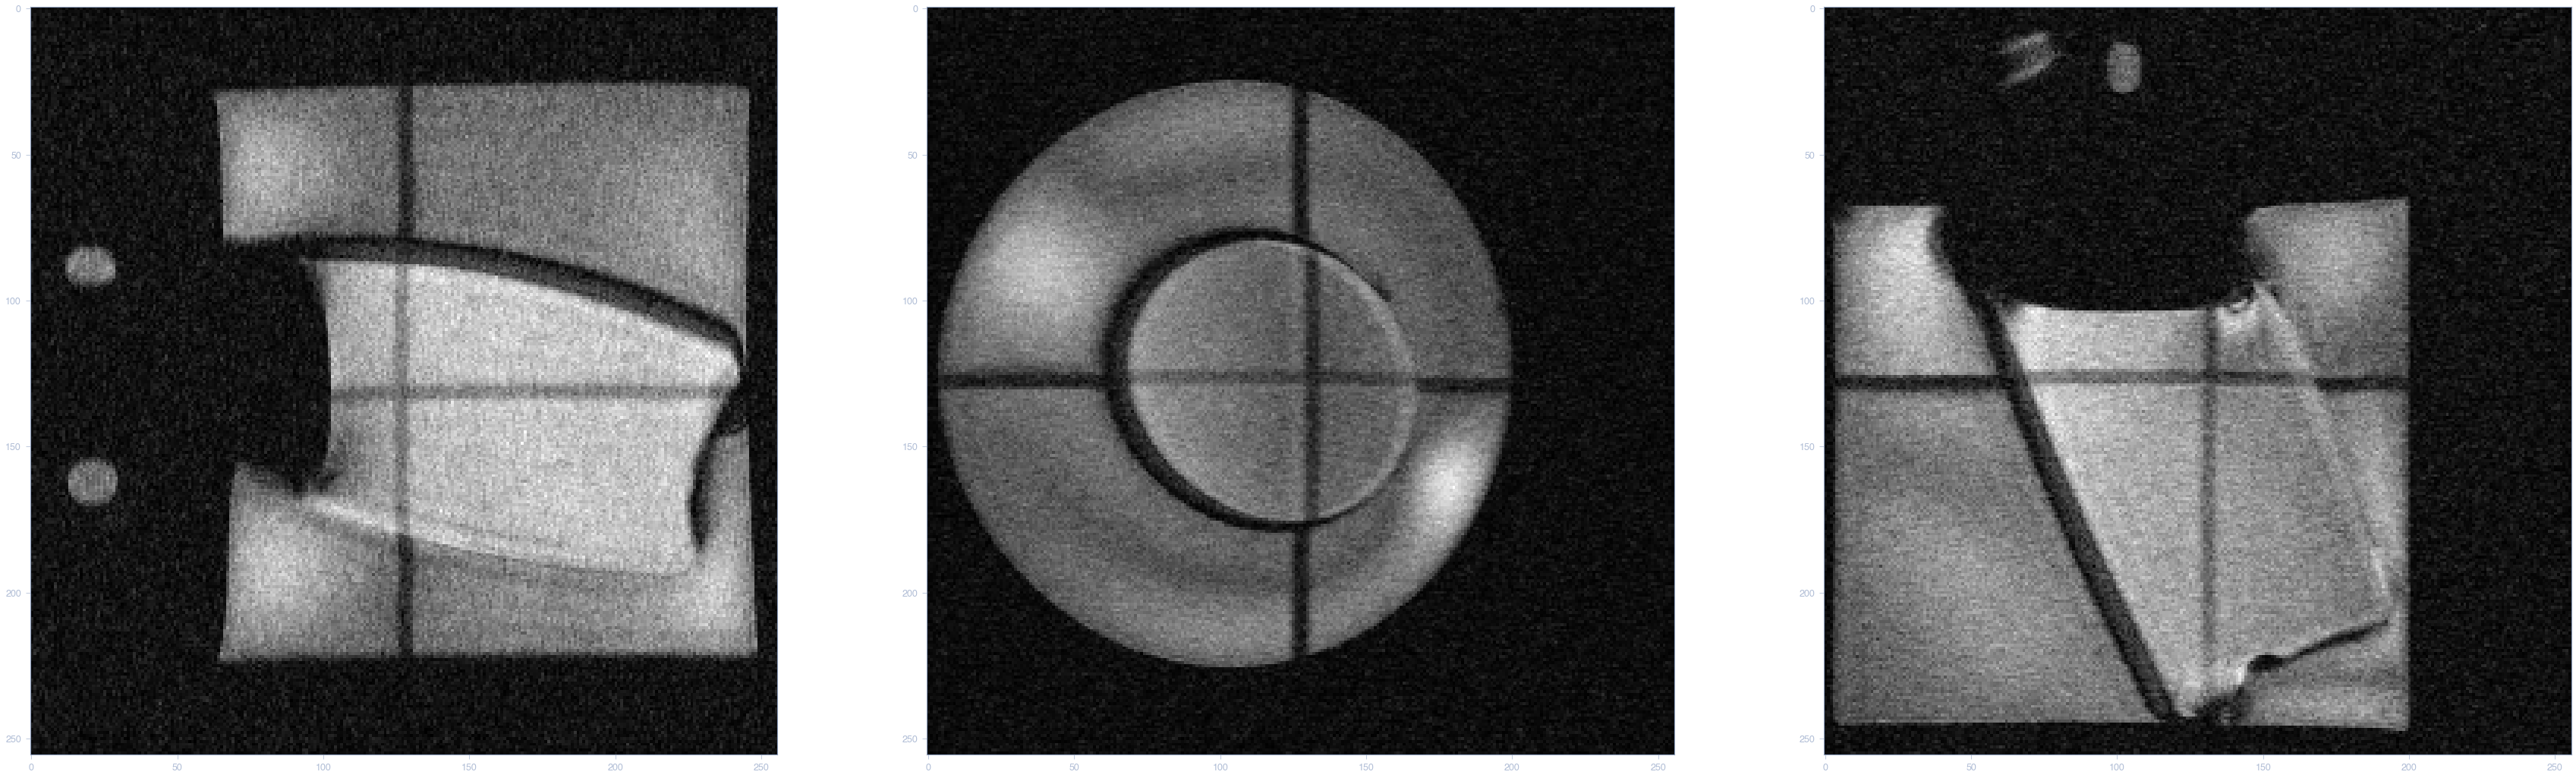

In [3]:
# display reconstructed images
size = 20
fig = plt.figure(figsize = (3*size, size))
plt.subplot(1,3,1)
plt.imshow(np.abs(Exp.image[:,:,0,0,0,0,0]), cmap='gray')
plt.subplot(1,3,2)
plt.imshow(np.abs(Exp.image[:,:,0,0,0,1,0]), cmap='gray')
plt.subplot(1,3,3)
plt.imshow(np.abs(Exp.image[:,:,0,0,0,2,0]), cmap='gray')

In [4]:
# Select data to reconstruct
def recon_fat_water(exp_number):
    series = exp_number
    path = "/Users/admin/Desktop/brukerMRI-master/scans/w_p/"  # access to mapped MRT network dri
    Exp = bruker.ReadExperiment(path,series)

    # Full recon steps
    recopart = ['quadrature', 'phase_rotate', 'zero_filling', 'FT', 'cutoff', 'sumOfSquares', 'transposition']
    Exp.bruker_reco(recopart)

    return Exp.image

## Two Point DIXON

### Equation of 2 Images

The simplest approach uses only two images.
The basic assumption is that there are only two
components in the image, water and fat. If $m_w$ is
the image of the water component, and $m_f$ is the
image of the fat component, the combined image
at an echo time $T_E,i$ is

\begin{equation*}
m_i   = m_w + e^{-i\omega_fT_{E,i}}m_f
\tag{1}
\end{equation*}

where we have assumed, for convenience, that we
are exactly on the water resonance, so only the
lipid component precesses at $\omega_f$ .We choose $T_E,i$ so that

\begin{equation*}
\omega_fT_{E,i}= {0,\pi,mod (2\pi)}
\tag{2}
\end{equation*}

The two imgaes that result are

$$
\begin{align}
m_1   = m_w + m_f
\tag{3} \\
m_2   = m_w - m_f
\tag{4}
\end{align}
$$ 

We can then combine these to make images that contain only water, or only fat

$$
\begin{align}
m_w   = \frac12[m_1 + m_2]
\tag{5} \\
m_f   = \frac12[m_1 - m_2]
\tag{6}
\end{align}
$$

### Fat-Water Images using Equation 5 & 6

Assuming the assigned images, follows Equation 3,4,5 & 6,

$$
\begin{align}
m_1   = m_w + e^{-i\omega_fT_{E,i}}m_f
\tag{7} \\
m_2   = m_w + e^{-i(\omega_f+\pi)T_{E,i}}m_f
\tag{8}
\end{align}
$$ 

Water at 4.7ppm. Main fat peaks ppm: 6.7, 1.718, 1.162, 0.863, 0.581.

### Calculating TE1

* ω is the angular frequency (2π*f, where f is the frequency of rotation of the proton) 
* f is given by chemical shift (in ppm)*carrier frequency of scanner (in MHz)
* t1 is the echo time of the image

In [5]:
f_fat = 6.7*400
f_water = 4.7*400
w_fat = 2*np.pi*f_fat
w_water = 2*np.pi*f_water

In [6]:
t1 = 3.25

In [7]:
n = t1*(f_fat-f_water)

In [8]:
t2 = (n+0.5)/(f_fat-f_water)
t2

3.250625

### Image with TE = 3.25ms & TE = 3.257ms

In [9]:
m1_3 = recon_fat_water(20)
m2_4 = recon_fat_water(13)

No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff
sumOfSquares
transposition
No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff
sumOfSquares
transposition


In [10]:
m1_3 = m1_3.reshape([128,128])
m2_4 = m2_4.reshape([128,128])

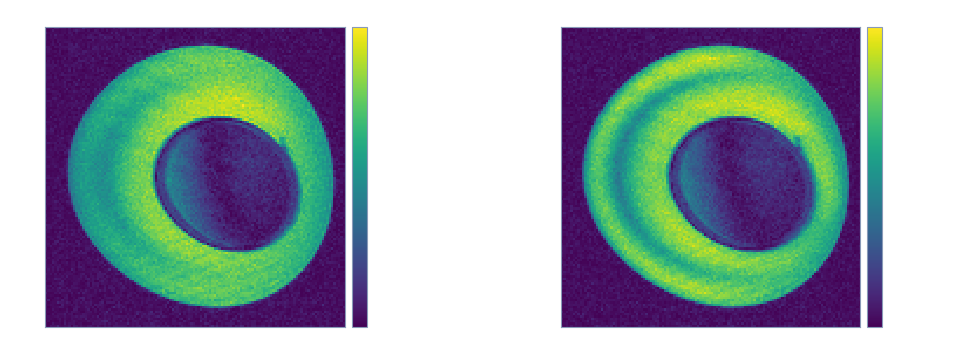

In [11]:
img = {'$T_{E,i}$ = 3.25ms': m1_3,
       '$T_{E,i} = 3.257ms$': m2_4
      }
plot.comparison_i_plots(img,15,12)

#### Applying Equation 5 & 6 for $m_w$ & $m_f$ respectively

In [12]:
m_w_5 = .5*(m1_3+m2_4)
m_f_6 = .5*(m1_3-m2_4)

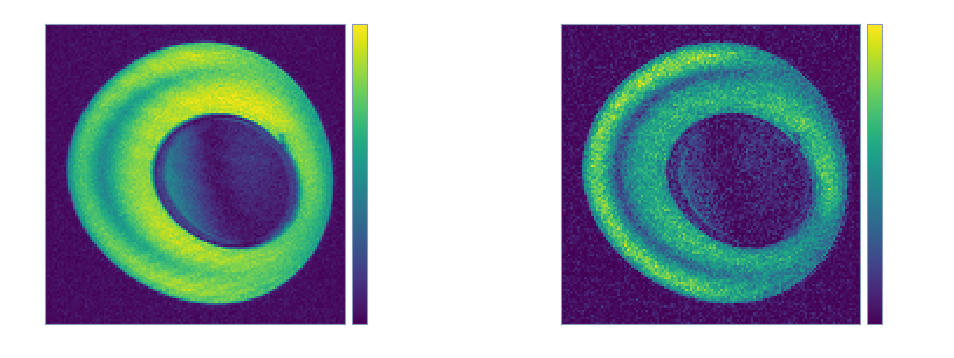

In [13]:
img2 = {'Image of Water':m_w_5,
        'Image of Fat':m_f_6
       }
plot.comparison_i_plots(img2,15,12)

In [14]:
def calc_t2(t1):
    n = t1*(f_fat-f_water)
    t2 = (n+0.5)/(f_fat-f_water)
    return t2

### Image with TE = 4ms & TE = 4.4ms

In [15]:
# given main fat peak w_f = 2.0, 2.0ppm shift from exact water resonance
# to obtain equation (4) equation (2) must equal to pi
t2_2 = calc_t2(4.0)
t2_2

4.000625

In [16]:
m1_3_4 = recon_fat_water(23)
m2_4_4 = recon_fat_water(18)
m1_3_4 = m1_3_4.reshape([128,128])
m2_4_4 = m2_4_4.reshape([128,128])
m_w_5_4 = .5*(m1_3_4+m2_4_4)
m_f_6_4 = .5*(m1_3_4-m2_4_4)

No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff
sumOfSquares
transposition
No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff
sumOfSquares
transposition


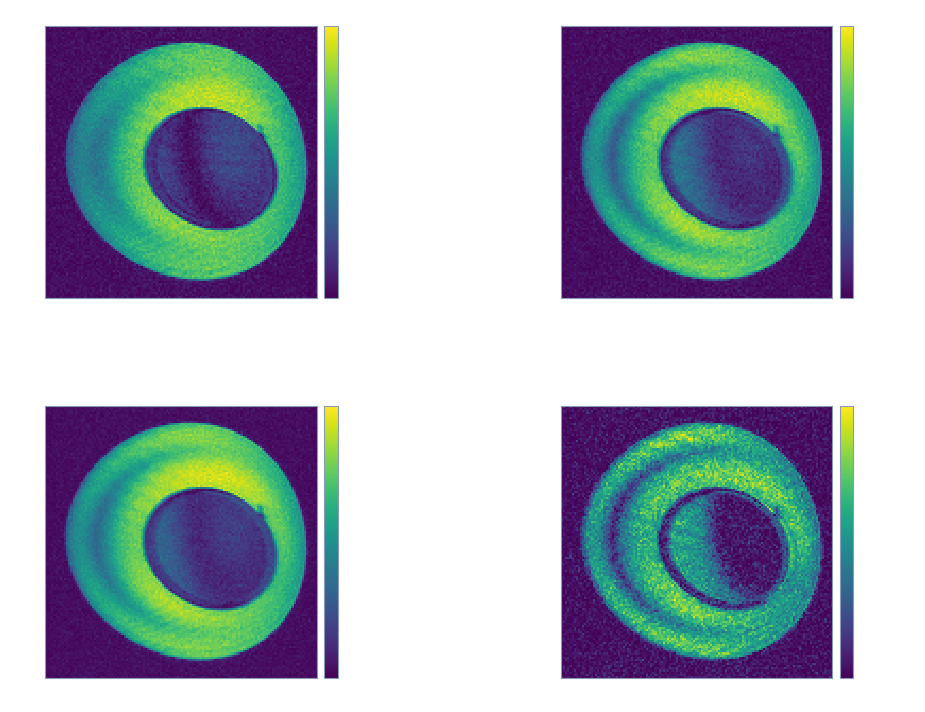

In [17]:
img4 = {'Image with $T_{E,i} = 3ms$':m1_3_4,
        'Image with $T_{E,i} = 4.6ms$':m2_4_4,
        'Image of Water':m_w_5_4,
        'Image of Fat':m_f_6_4
        }
plot.comparison_i_plots(img4,15,12)

### Image with TE = 4.4ms & TE = 4.6ms

In [18]:
# given main fat peak w_f = 2, 2ppm shift from exact water resonance
# to obtain equation (4) equation (2) must equal to pi
# given main fat peak w_f = 2.0, 2.0ppm shift from exact water resonance
# to obtain equation (4) equation (2) must equal to pi
t2_3 = calc_t2(4.4)
t2_3

4.400625000000001

In [19]:
m1_3_5 = recon_fat_water(18)
m2_4_5 = recon_fat_water(29)
m1_3_5 = m1_3_5.reshape([128,128])
m2_4_5 = m2_4_5.reshape([128,128])
m_w_5_5 = .5*(m1_3_5+m2_4_5)
m_f_6_5 = .5*(m1_3_5-m2_4_5)

No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff
sumOfSquares
transposition
No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff
sumOfSquares
transposition


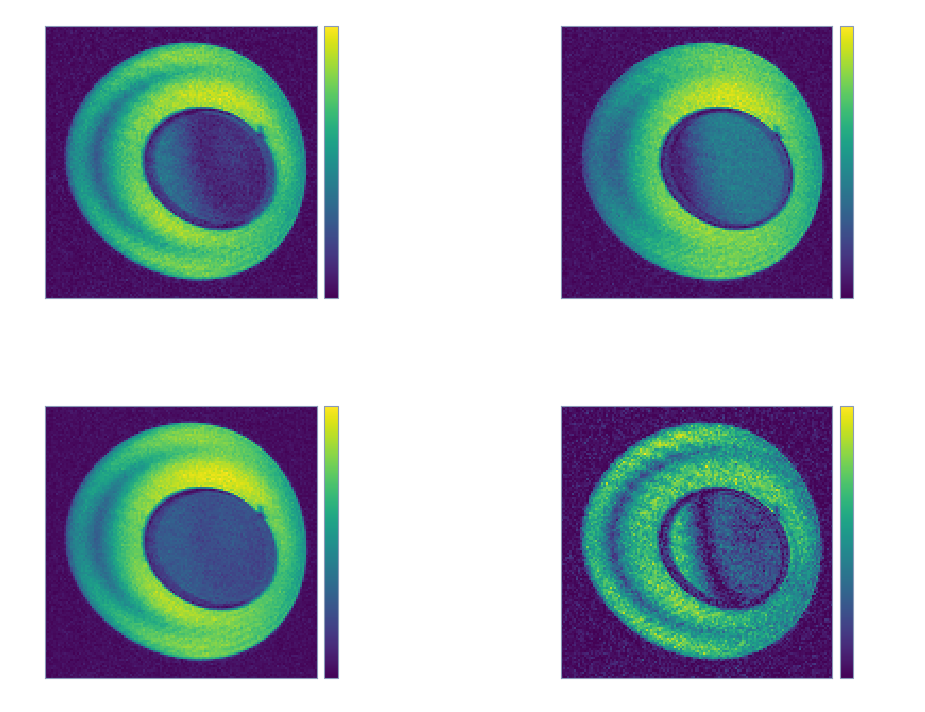

In [20]:
img5 = {'Image with $T_{E,i} = 4.4 ms$':m1_3_5,
        'Image with $T_{E,i} = 4.6 ms$':m2_4_5,
        'Image of Water':m_w_5_5,
        'Image of Fat':m_f_6_5
        }
plot.comparison_i_plots(img5,15,12)

### Image with TE = 6ms & TE = 6.6ms

In [21]:
# given main fat peak w_f = 2, 2 ppm shift from exact water resonance
# to obtain equation (4) equation (2) must equal to pi
t2_4 = calc_t2(6)
t2_4

6.000625

In [22]:
m1_3_6 = recon_fat_water(32)
m2_4_6 = recon_fat_water(33)
m1_3_6 = m1_3_6.reshape([128,128])
m2_4_6 = m2_4_6.reshape([128,128])
m_w_5_6 = .5*(m1_3_6+m2_4_6)
m_f_6_6 = .5*(m1_3_6-m2_4_6)

No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff
sumOfSquares
transposition
No information about active channels available.
assuming number of channels = 1
quadrature
phase_rotate
zero_filling
FT
cutoff
sumOfSquares
transposition


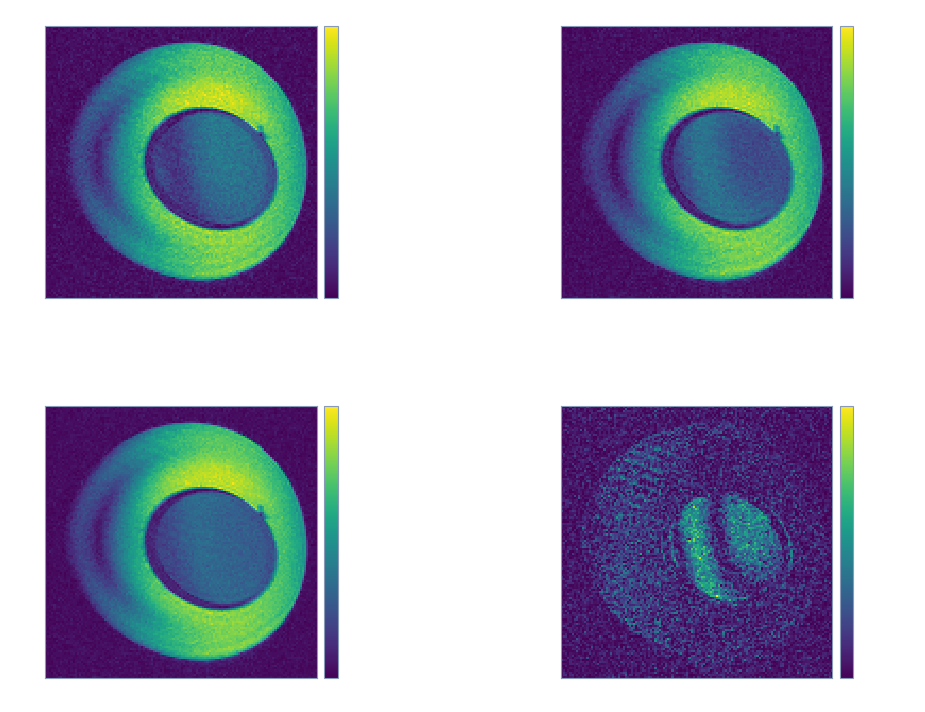

In [23]:
img5 = {'Image with $T_{E,i} = 6 ms$':m1_3_6,
        'Image with $T_{E,i} = 6.6 ms$':m2_4_6,
        'Image of Water':m_w_5_6,
        'Image of Fat':m_f_6_6
        }
plot.comparison_i_plots(img5,15,12)